<a href="https://colab.research.google.com/github/Meghana-GH/Exploratory-Data-Analysis-of-Car-features/blob/master/ML_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#**Introduction**

##**What is Exploratory Data Analysis ?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we understand the problem better and try to uncover hidden insights

How to perform Exploratory Data Analysis ? Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this notebook you can understand some common methods and plots that would be used in the EDA process.

What data are we exploring today ?

The data-set can be downloaded from here. To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this notebook, we will explore the data and make it ready for modeling.

In [ ]:
df=pd.read_csv('data.csv')
#reading the data

#**STEP 1**

##**Loading** **the** **data** **into** **the** **data** **frame**

 Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.
 
To get or load the dataset into the notebook, all I did was one trivial step. In Google Colab at the left-hand side of the notebook, you will find a “>” (greater than symbol). When you click that you will find a tab with three options, you just have to select Files. Then you can easily upload your file with the help of the Upload option. No need to mount to the google drive or use any specific libraries just upload the data set and your job is done. One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled. This is how I got the data set into the notebook.

In [ ]:
#@title
df.head()
#To display the top 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#@title
df.tail(5)
#To display the bottom 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


#**checking the Data Types**

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string or object, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [ ]:
df.info()
#getting the summary of the data frames

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


#**STEP 2**

##**Dropping irrelevant columns**

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [ ]:
df=df.drop(['Engine Fuel Type','Number of Doors','Vehicle Style','Market Category'],axis=1)
df.head(5)


,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,3916,34500


#**STEP 3**

##**Renaming the columns**


In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [ ]:
df=df.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive Mode","highway MPG":"MPG-H","city mpg":"MPG-C","MSRP":"Price"})
df.head(5)
#renaming the columns

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,3916,34500


#**STEP 4**

##**Dropping the duplicate rows**


This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10944 data meaning that I had 970 of duplicate data.


In [ ]:
df.shape
#checking the no of rows and columns

(11914, 12)

In [ ]:
duplicate_rows_df=df[df.duplicated()]
print("number of duplicate rows", duplicate_rows_df.shape)
#rows containing duplicate rows

number of duplicate rows (970, 12)


In [ ]:
df=df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,3916,34500


In [ ]:
df.shape

(10944, 12)

##**Dropping the missing or Null Values**

In [ ]:
print(df.isnull().sum())
#to check the missing or null values

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
Vehicle Size     0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


In [ ]:
df.fillna(method='ffill',inplace=True)
#filling the missing or null values by ffillna method

In [ ]:
print(df.isnull().sum())
#to check the null values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
Vehicle Size    0
MPG-H           0
MPG-C           0
Popularity      0
Price           0
dtype: int64


#**STEP 5**

##**Detecting Outliers**


An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it’s a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. 

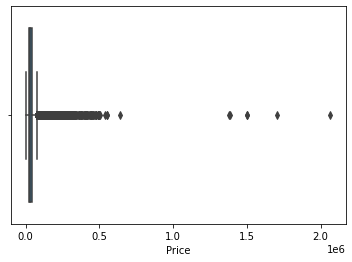

In [ ]:
sns.boxplot(x=df['Price'])

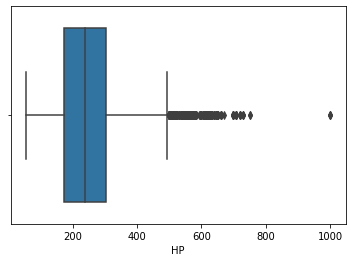

In [ ]:
sns.boxplot(x=df['HP'])

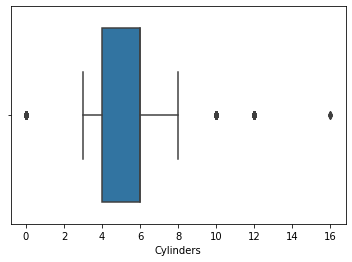

In [ ]:
sns.boxplot(x=df['Cylinders'])

##**Removing the outliers by IQR method**

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              130.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21300.0
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8477, 12)

##**Plot different features against one another (scatter), against frequency (histogram)**


**Histogram**

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

Text(0.5, 0, 'Make')

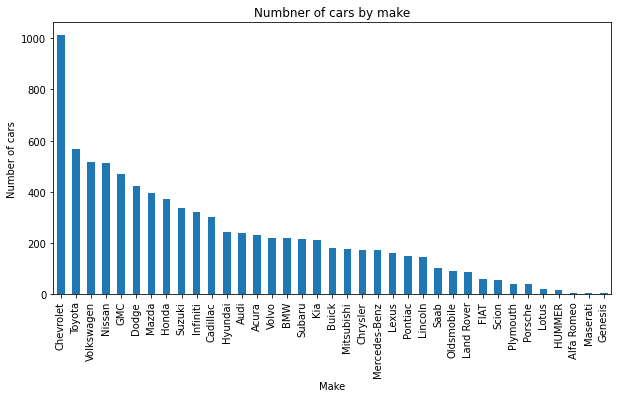

In [ ]:
#plotting a Histogram
df.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Numbner of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')


#**STEP 6**

##**FINDING AVERAGE CAR PRICE AMONS THE TOPS CAR BRANDS**

In [ ]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28561.969368
Dodge       26190.560284
GMC         33261.400853
Honda       27400.455526
Mazda       20830.670025
Nissan      28404.013672
Toyota      27860.319224
Volkswagen  29032.817476


#**Heat Maps**

**Heat Maps** is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

#**STEP 7**



##**GRAPHING HEAT MAP FOR A LITTLE ANALYSIS OF CORRELATION MATRIX**

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.315357,-0.116233,0.381806,0.341683,0.194604,0.580294
HP,0.315357,1.000000,0.734562,-0.452434,-0.554700,0.091854,0.744259
Cylinders,-0.116233,0.734562,1.000000,-0.692604,-0.747595,0.011857,0.387502
MPG-H,0.381806,-0.452434,-0.692604,1.000000,0.937142,0.093668,-0.120156
MPG-C,0.341683,-0.554700,-0.747595,0.937142,1.000000,0.080685,-0.198183
Popularity,0.194604,0.091854,0.011857,0.093668,0.080685,1.000000,0.107449
Price,0.580294,0.744259,0.387502,-0.120156,-0.198183,0.107449,1.000000


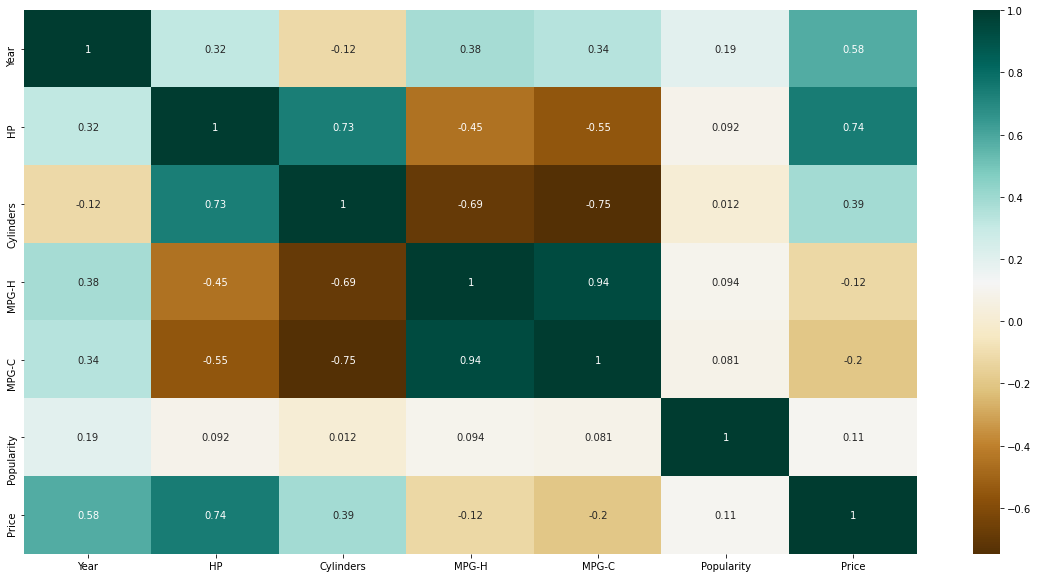

In [ ]:
#finding the relations between the variables.

plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

##**DOCUMENTING INSIGHTS** 

from the above it is concluded that price is positively depends on HP and Years . even they two are positiviely depend on each others . MPG-h and MPG-C are negatively strong correlation with cylinders.

positive correlation holds directly proportion relation and negative coorealtion holds inversely relation with thier respeccitve factors affecting them .

##**INSIGHTS FROM HEAT MAP**

There is a +ve correlation between:

Engine HP and Engine Cylinders // Engine HP and MSRP // Engine Cylinders and MSRP // MPG-H and MPG-C //

There is Strong -ve correlation between :

MPG-H and Cylinders MPG-C and Cylinders*



#**Scatterplot**


We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

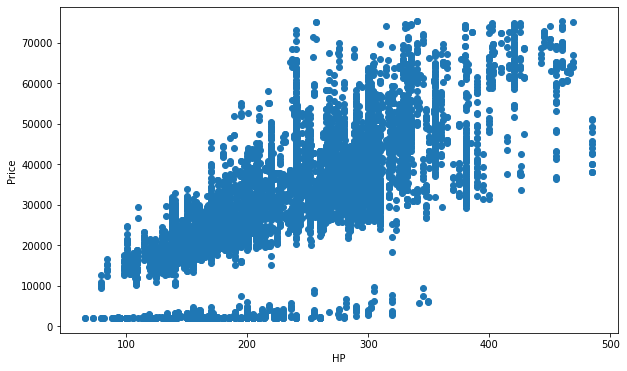

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

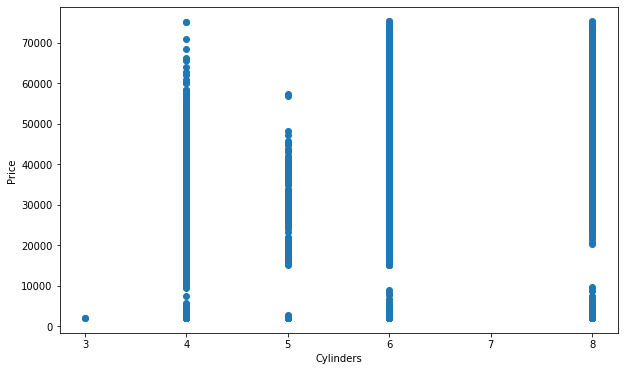

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Cylinders'], df['Price'])
ax.set_xlabel('Cylinders')
ax.set_ylabel('Price')
plt.show()

#**STEP 8**

##**plotting diff graphs and also checking how other variable affect the price of the car (EDA)**

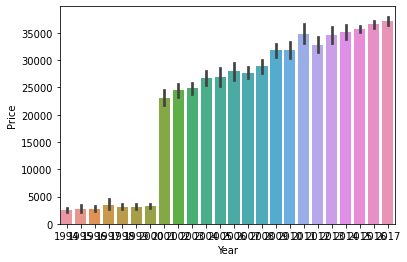

In [ ]:
sns.barplot(df['Year'],df['Price'])

In this graph (YEAR VS PRICE) in the starting years it was gradualy incrementing as well as decrementing but as the year is increasing the price of the cars increasing . ...**DOUCUMENT INSIGHTS OF GRAPH**.

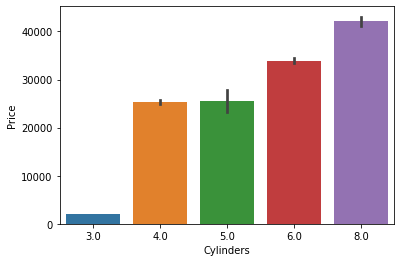

In [ ]:
sns.barplot(df['Cylinders'],df['Price'])

In this graph (CYLINDERS VS PRICE) IT shows that subtotals changes with each addition category and provide us with better understanding of data . ... **DOUCUMENT INSIGHTS OF GRAPH**

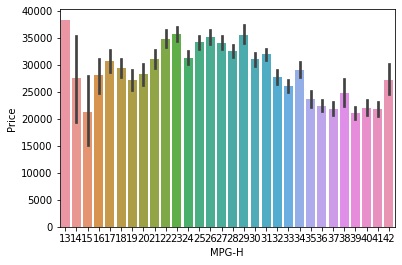

In [ ]:
sns.barplot(df['MPG-H'],df['Price'])

In this graph (MPG-H VS PRICE) It accomodates the occurence of values far away from the mean by representing the bigger part of a total ...**DOUCUMENT INSIGHTS OF GRAPH.**

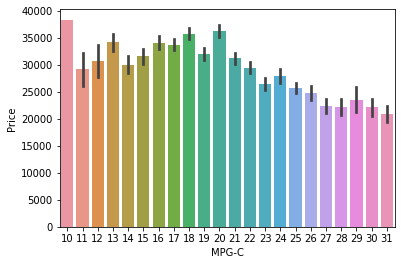

In [ ]:
sns.barplot(df['MPG-C'],df['Price'])

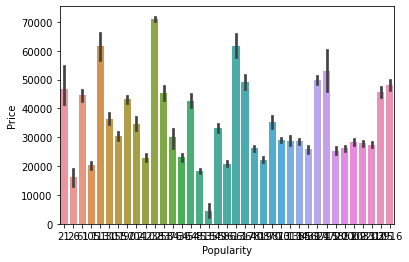

In [ ]:
sns.barplot(df['Popularity'],df['Price'])

##**OVERALL DOCUMENTING INSIGHT**

1. **Car price increased after year 2000**
2.**More the no the cylinders, more is the price**
3. **For MPG-H 13, price is maximum and for MPG-H 15, price is lowest**.
4.**For MPG-C 10, price is maximum and for MPG-C 31, price is minimum**

Text(0.5, 0, 'Price')

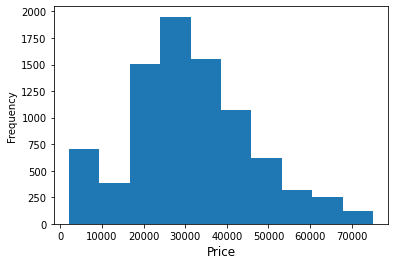

In [ ]:
df['Price'].plot.hist()
plt.xlabel('Price', fontsize=12)

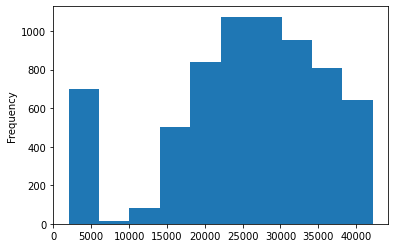

In [ ]:
(df['Price'].loc[df['Price']<4.223125e+04 ]).plot.hist()

Text(0.5, 0, 'Car Year')

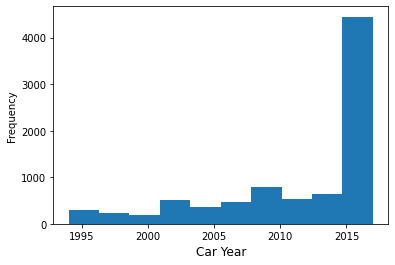

In [ ]:
df['Year'].plot.hist()
plt.xlabel('Car Year', fontsize=12)

Text(0.5, 0, 'Popularity of the Car')

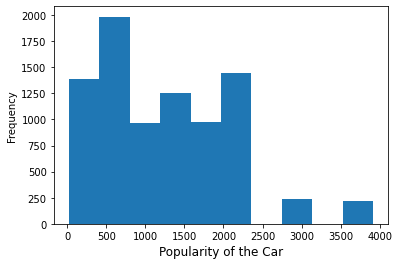

In [ ]:
df['Popularity'].plot.hist()
plt.xlabel('Popularity of the Car', fontsize=12)

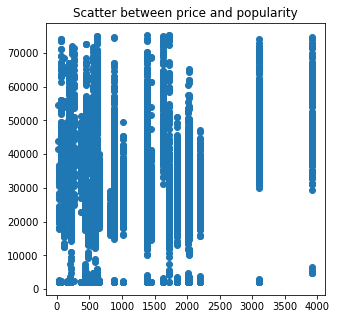

In [ ]:
fig, ax=plt.subplots(figsize=(5,5))
ax.scatter(df['Popularity'],df['Price'])
plt.title('Scatter between price and popularity')
ax.set_xlabel=('Popularity')
ax.st_ylabel=('Price')
plt.show()

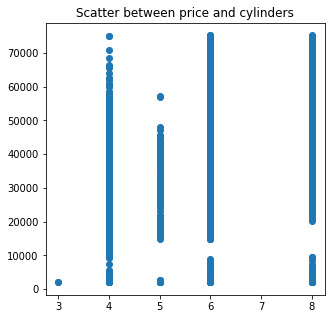

In [ ]:
fig, ax=plt.subplots(figsize=(5,5))
ax.scatter(df['Cylinders'],df['Price'])
plt.title('Scatter between price and cylinders')
ax.set_xlabel=('Cylinders')
ax.st_ylabel=('Price')
plt.show()

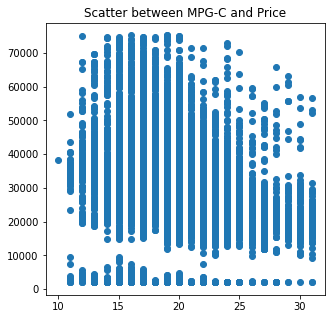

In [ ]:
fig, ax=plt.subplots(figsize=(5,5))
ax.scatter(df['MPG-C'],df['Price'])
plt.title('Scatter between MPG-C and Price')
ax.set_xlabel=('MPG-C')
ax.st_ylabel=('Price')
plt.show()

In [ ]:
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

#**STEP 9**

##**ML Model**

 

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

##**Just Splitting Data set In 80:20 using Pareto principle**.

What Is the Pareto Principle? for splitting
The Pareto Principle, named after esteemed economist Vilfredo Pareto, specifies that 80% of consequences come from 20% of the causes, asserting an unequal relationship between inputs and outputs. This principle serves as a general reminder that the relationship between inputs and outputs is not balanced. The Pareto Principle is also known as the Pareto Rule or the 80/20 Rule.*

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

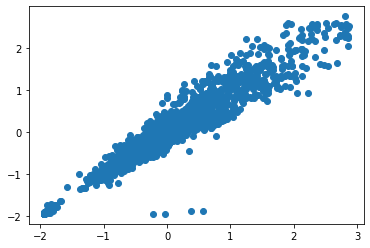

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

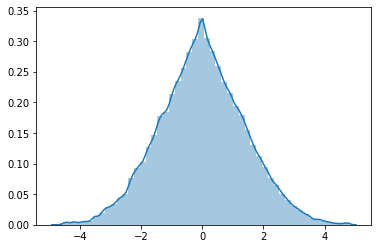

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

**r2 score**

—varies between 0 and 100%. It is closely related to the MSE (see below), but not the same. Wikipedia defines r2 like this, ” … is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).” Another definition is “(total variance explained by model) / total variance.” So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.

Reading the code below, we do this calculation in three steps to make it easier to understand. g is the sum of the differences between the observed values and the predicted ones. (ytest[i] – preds[i]) **2. y is each observed value y[i] minus the average of observed values np.mean(ytest). And then the results are printed thus:

**mean square error (MSE)—**

is the average of the square of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values y1, y2, y3, … and the predicted ones pred(y1), pred(y2), pred(y3), … We square each difference (pred(yn) – yn)) ** 2 so that negative and positive values do not cancel each other out.

**Mean Absolute Error or MAE**

We know that an error basically is the absolute difference between the actual or true values and the values that are predicted. Absolute difference means that if the result has a negative sign, it is ignored.

Hence, MAE = True values – Predicted values

MAE takes the average of this error from every sample in a dataset and gives the output. But this value might not be the relevant aspect that can be considered while dealing with a real-life situation because the data we use to build the model as well as evaluate it is the same, which means the model has no exposure to real, never-seen-before data. So, it may perform extremely well on seen data but might fail miserably when it encounters real, unseen data.

The concepts of underfitting and overfitting can be pondered over, from here:

Underfitting: The scenario when a machine learning model almost exactly matches the training data but performs very poorly when it encounters new data or validation set.

Overfitting: The scenario when a machine learning model is unable to capture the important patterns and insights from the data, which results in the model performing poorly on training data itself.

This can be implemented using sklearn’s mean_absolute_error method:

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.1896135967713298
Root Mean Squared Error: 0.27660865981490923
R2 Score: 0.9233607693386278


#**STEP 10**

##**different algorithms and check their performance over metrics like R square, RMSE, MAE etc and document your findings**

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

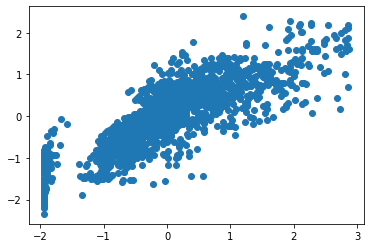

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

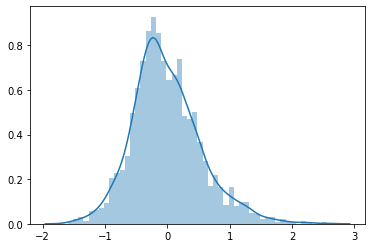

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.427983671142486
Root Mean Squared Error: 0.5525545763930113
R2 Score: 0.6941771354689905


##**document my findings**


There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.

Similarly, there is also no correct answer as to what R2 should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models.

Our take away message here is that you cannot look at these metrics in isolation in sizing up your model. You have to look at other metrics as well, plus understand the underlying math.